In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import math as m

In [32]:
# 待求解方程：du/dt = u * cos (\theta t)，0 <= t <= 2 * pi, u(0)=2
# 目标数据由du/dt = u * cos (2*t)生成，可求得其解析解u=2*exp(0.5*sin(2t))后加随机噪声，也可不加
theta = tf.Variable(1., dtype=tf.float64) 
def ode_func(t, u):
    global theta
    return u*tf.math.cos(theta*t)
#t_init, t_end = tf.constant(0.,tf.float64, shape=(1,)), tf.constant(m.pi,tf.float64,shape=(1,))
t_init, t_end = 0., m.pi
u_init = tf.constant(2.0,dtype=tf.float64,shape=1)


In [3]:
# 生成数据集
t_exact = tf.constant(np.arange(t_init, t_end, step=(t_end-t_init)/50))
correct_theta = tf.constant(2., dtype=tf.float64)
u_exact = 2*tf.math.exp((1/correct_theta)*tf.math.sin(correct_theta*t_exact))

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [5]:

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


In [6]:
test_u = tf.function(lambda: tfp.math.ode.BDF().solve(ode_func, t_init, u_init, solution_times=t_exact), autograph=True)().states

Start epoch 0
loss = 5.119039
theta = 1.720667
Start epoch 1
loss = 0.126185
theta = 1.749058
Start epoch 2
loss = 0.100831
theta = 1.773877
Start epoch 3
loss = 0.081341
theta = 1.795812
Start epoch 4
loss = 0.066054
theta = 1.815349
Start epoch 5
loss = 0.053890
theta = 1.832847
Start epoch 6
loss = 0.044108
theta = 1.848584
Start epoch 7
loss = 0.036184
theta = 1.862778
Start epoch 8
loss = 0.029729
theta = 1.875607
Start epoch 9
loss = 0.024451
theta = 1.887221
Start epoch 10
loss = 0.020122
theta = 1.897745
Start epoch 11
loss = 0.016566
theta = 1.907288
Start epoch 12
loss = 0.013641
theta = 1.915946
Start epoch 13
loss = 0.011233
theta = 1.923804
Start epoch 14
loss = 0.009249
theta = 1.930936
Start epoch 15
loss = 0.007615
theta = 1.937410
Start epoch 16
loss = 0.006268
theta = 1.943286
Start epoch 17
loss = 0.005158
theta = 1.948619
Start epoch 18
loss = 0.004244
theta = 1.953459
Start epoch 19
loss = 0.003491
theta = 1.957852
Start epoch 20
loss = 0.002871
theta = 1.961837
St

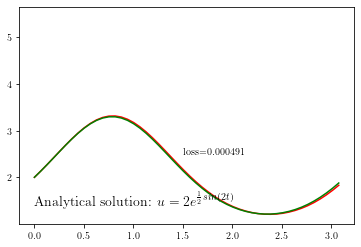

In [33]:
n_epoches = 30
optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)
fig, ax = plt.subplots()
ims = []

line, = ax.plot(t_exact, test_u, c='r')
text = ax.text(1.5, 2.5, "loss=NAN")

plt.plot(t_exact, u_exact, c='g')
plt.text(1.0, 1.4, r"Analytical solution: $u=2e^{\frac{1}{2}sin(2t)}$", horizontalalignment='center', fontsize=14)

losses = []
u_preds = []
for epoch in range(n_epoches):
    print("Start epoch %d" %(epoch))
    with tf.GradientTape() as tape:
        tape.watch(theta)
        u_pred = tf.function(lambda: tfp.math.ode.BDF().solve(ode_func, t_init, u_init, solution_times=t_exact), autograph=True)()
        #u_pred = tfp.math.ode.BDF().solve(ode_func, t_init, u_init, solution_times=t_exact)
        loss = tf.reduce_mean(tf.square(u_pred.states[:,0]-u_exact))
    losses.append(float(loss))
    u_preds.append(u_pred.states)
    
    grad = tape.gradient(loss, theta)
    optimizer.apply_gradients(zip([grad], [theta]))
    print("loss = %f" %(loss))
    print("theta = %f" %(theta))

for i in range(20):
    u_preds.append(u_preds[-1])
    losses.append(losses[-1])
def update(i):
    line.set_ydata(u_preds[i])
    text.set_text("loss=%f"%(float(losses[i])))
    return line, text,
ani = animation.FuncAnimation(fig, update, np.arange(0, 50), interval=50, repeat_delay=10000)
ani.save("test.gif", writer='pillow', dpi=800)

    